In [1]:
import pandas as pd
import math
import os
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import random
from sklearn import datasets    
from sklearn.model_selection import train_test_split    
from sklearn.neighbors import KNeighborsClassifier   
import numpy as np  
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler



# 1. Combined Cycle Power Plant Data Set

## Explore the Data:

In [2]:
df = pd.read_excel('../Data/data_used.xlsx')

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


i. Rows and Columns

In [4]:
print ('There are',len(df), 'rows,', len(df.columns), 'columns ' 'in this data set.')
print ('The columns are features of hourly average ambient variables Temperature (AT),\
Ambient Pressure (AP), Relative Humidity (RH)and Exhaust Vacuum (V)\
to predict the net hourly electrical energy output (PE)  of the plant.')
print ('the rows are different data points')

There are 9568 rows, 5 columns in this data set.
The columns are features of hourly average ambient variables Temperature (AT),Ambient Pressure (AP), Relative Humidity (RH)and Exhaust Vacuum (V)to predict the net hourly electrical energy output (PE)  of the plant.
the rows are different data points


ii. Scatterplots 

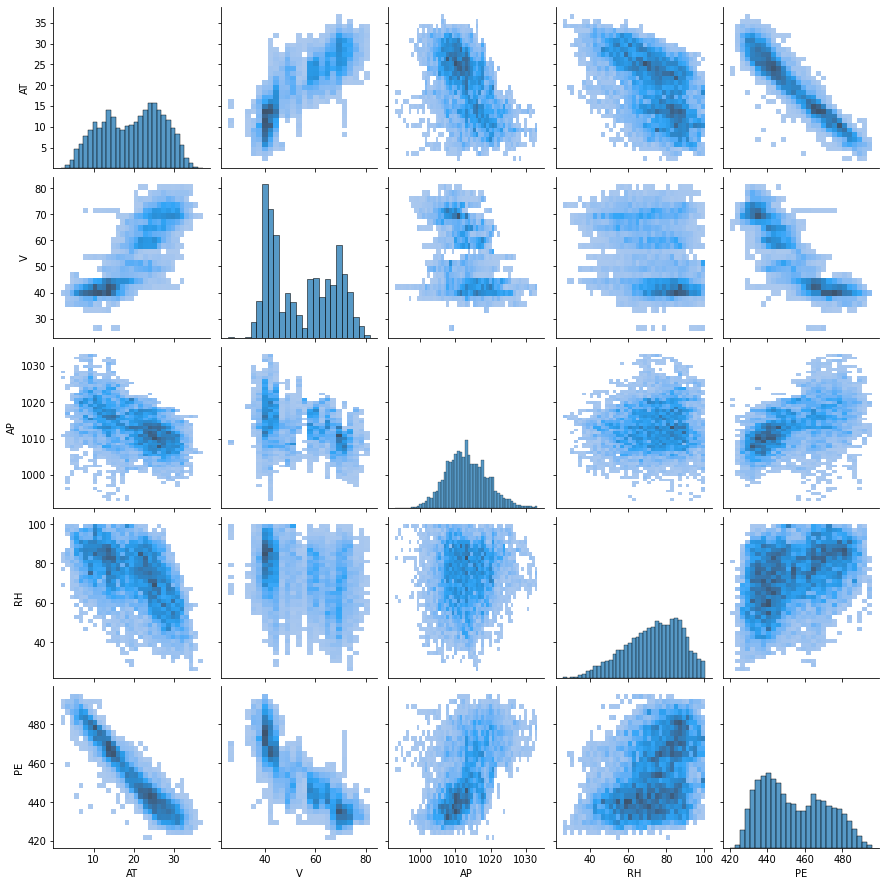

In [5]:
sns.pairplot(df,kind="hist")

Finding: there is a relatively strong linear relationship between AT and PE, and V and PE.\
While AP and RH do not have a obvious linear relationship with PE

 iii. Table of Mean, Median, Range, First and third quartiles, and Interquartile rages of each variables

In [6]:
description = df.describe()
rang = description.T['max'] - description.T['min']
ITQ = description.T['75%'] = description.T['25%']
description = description.append(pd.Series(rang, name = 'range '))
description = description.append(pd.Series(ITQ, name = 'interquartile rages'))
description

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,13.510000,41.740000,1009.100000,63.327500,439.750000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile rages,13.510000,41.740000,1009.100000,63.327500,439.750000


## c. Simple Linear Regression

In [7]:
def sim_lin(col_num):
    #Regression
    x = df.iloc[:,col_num-1]
    y = df.iloc[:,4]
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    print (model.summary())
    #plot
    sns.regplot(x = df.iloc[:,col_num-1], y = df.iloc[:,4], line_kws = {'color':'g'}, scatter_kws = {'alpha':0.1})

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:25   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

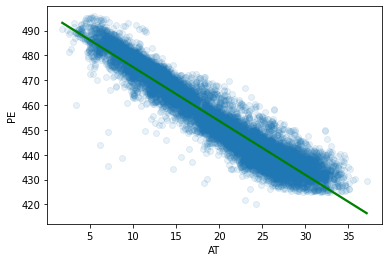

In [8]:
sim_lin(1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:25   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

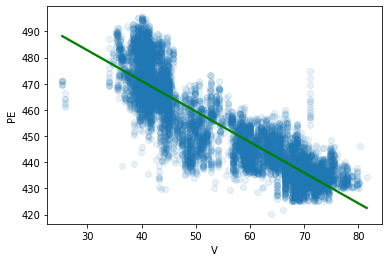

In [9]:
sim_lin(2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:26   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

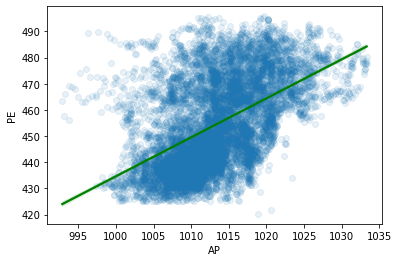

In [10]:
sim_lin(3)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:27   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

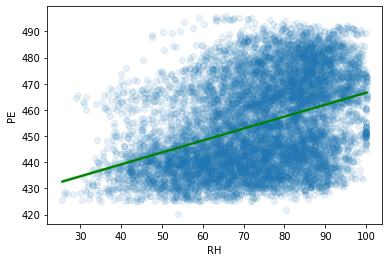

In [11]:
sim_lin(4)

##  c2. interpretation & outliers

All the four linear regressions model has very small p_values(<0.05). Therefore there is a\
statitically significant assoviation betweenAT/V/AP/RH and PE

To find the outliers, the following approach is used:
Finding the median, quartile, and interquartile regions
Calculate 1.5*IQR below the first quartile and check for low outliers.
Calculate 1.5*IQR above the third quartile and check for outliers.

In [12]:
def outlier(col_num):
    x = df.iloc[:, col_num-1]
    x = x.values.reshape((-1, 1))
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    med = np.median(x)
    iqr = q3-q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    
    outliers = x[(x<= lower_bound)| (x>= upper_bound)]
    
    
    print('The following are the outliers in the boxplot:{}'.format(outliers))

In [13]:
outlier(1)

The following are the outliers in the boxplot:[]


In [14]:
outlier(2)

The following are the outliers in the boxplot:[]


In [15]:
outlier(3)

The following are the outliers in the boxplot:[1030.46 1033.25 1030.18 1031.1  1029.65 1029.8  1033.04 1033.3  1032.67
 1033.08  994.17  995.88  995.24 1031.55  996.32 1029.6  1030.3  1031.5
 1030.94  996.55 1030.83 1031.96  996.35 1031.01 1030.77 1032.98 1032.93
 1031.33  996.03 1030.86 1030.72 1033.19 1031.96 1030.42 1032.86 1032.77
 1029.63 1033.09 1030.82 1029.99 1031.8  1032.08  993.31 1033.14 1029.54
 1032.88 1029.7  1030.81 1030.    995.45 1030.2  1032.72 1031.45 1032.14
 1029.91  995.02 1031.14  993.82 1032.83 1032.37 1032.16 1031.16 1030.72
 1029.9   994.6  1030.1  1029.61  993.74 1031.39 1031.2  1031.27 1030.38
 1031.97 1033.29 1031.58 1031.08  993.11 1031.75 1029.54 1029.7  1031.21
 1031.34 1030.68  992.89 1031.71 1031.21 1031.32 1030.61]


In [16]:
outlier(4)

The following are the outliers in the boxplot:[25.89 28.16 29.43 26.67 29.86 30.59 25.56 30.83 28.81 26.3  30.34 30.99]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb31fe85760>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb31fe85e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb31fe853d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb31fe8f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb31fe8f970>],
 'means': []}

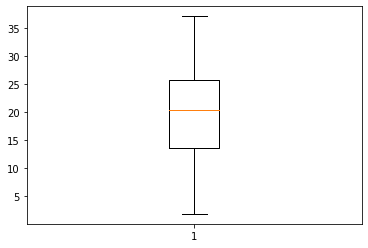

In [17]:
plt.boxplot(df.iloc[:,0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb31ff9b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb31ffa7130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb31ff9b640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb31ffa7850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb31ffa7be0>],
 'means': []}

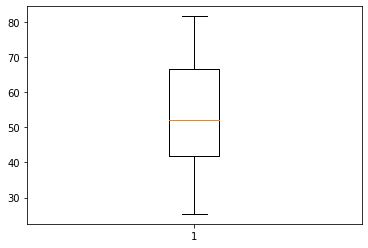

In [18]:
plt.boxplot(df.iloc[:,1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32007d4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32007dbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32007d130>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3200a4340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3200a46d0>],
 'means': []}

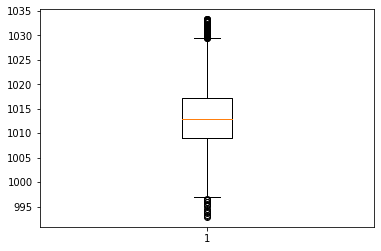

In [19]:
plt.boxplot(df.iloc[:,2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb31fc7f460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb31fc9ae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb31fc7faf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb31fc9a0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb31fc9a9d0>],
 'means': []}

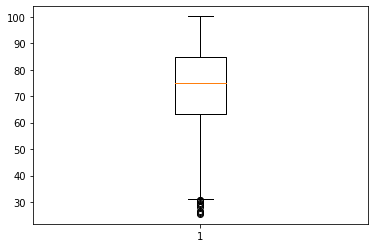

In [20]:
plt.boxplot(df.iloc[:,3])

In [21]:
print('Based on the outlier function and the boxplot, there is no outlier for AT, and V. the outliers for AP and RH are as following:')
print ('AP: ')
print (outlier(3))
print ('RH: ')
print (outlier(4))

Based on the outlier function and the boxplot, there is no outlier for AT, and V. the outliers for AP and RH are as following:
AP: 
The following are the outliers in the boxplot:[1030.46 1033.25 1030.18 1031.1  1029.65 1029.8  1033.04 1033.3  1032.67
 1033.08  994.17  995.88  995.24 1031.55  996.32 1029.6  1030.3  1031.5
 1030.94  996.55 1030.83 1031.96  996.35 1031.01 1030.77 1032.98 1032.93
 1031.33  996.03 1030.86 1030.72 1033.19 1031.96 1030.42 1032.86 1032.77
 1029.63 1033.09 1030.82 1029.99 1031.8  1032.08  993.31 1033.14 1029.54
 1032.88 1029.7  1030.81 1030.    995.45 1030.2  1032.72 1031.45 1032.14
 1029.91  995.02 1031.14  993.82 1032.83 1032.37 1032.16 1031.16 1030.72
 1029.9   994.6  1030.1  1029.61  993.74 1031.39 1031.2  1031.27 1030.38
 1031.97 1033.29 1031.58 1031.08  993.11 1031.75 1029.54 1029.7  1031.21
 1031.34 1030.68  992.89 1031.71 1031.21 1031.32 1030.61]
None
RH: 
The following are the outliers in the boxplot:[25.89 28.16 29.43 26.67 29.86 30.59 25.56 30.83 28.

##  d. Multiple Regression Model

In [22]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:28   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Because P-value < 0.05 for AT, V, AP and RH, for all predictors we can reject the null hypothesis H_0

## e. Comparison bt\ 1c and 1d

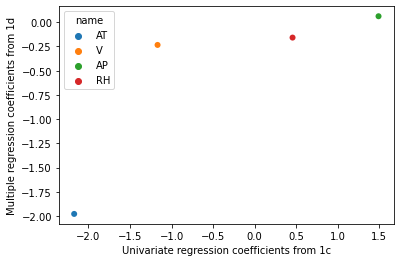

In [23]:
X = [-2.17131996,-1.16813513,1.48987167,0.4556501]
Y = [-1.9775,-0.2339,0.0621 ,-0.1581]
Z = ['AT','V','AP','RH']
data_plot = pd.DataFrame({"Univariate regression coefficients from 1c": X, "Multiple regression coefficients from 1d": Y,"name": Z})
sns.scatterplot(x="Univariate regression coefficients from 1c", y="Multiple regression coefficients from 1d",
                hue="name",
                palette='tab10',
                sizes=(1, 8), linewidth=0,
                data=data_plot,)
plt.show()

## f. Nonlinear Association

In [24]:
def three_degree_lin (col_num):
    x = df.iloc[:, col_num-1]
    x = x.values.reshape((-1, 1))
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x)
    x_poly = pd.DataFrame(x_poly, columns = poly.get_feature_names())

    x_new = x_poly
    y = df.iloc[:,4]
    x = sm.add_constant(x_new)
    model = sm.OLS(y,x_new).fit()
    print (model.summary())

In [25]:
def two_degree_lin (col_num):
    x = df.iloc[:, col_num-1]
    x = x.values.reshape((-1, 1))
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x)
    x_poly = pd.DataFrame(x_poly, columns = poly.get_feature_names())

    x_new = x_poly
    y = df.iloc[:,4]
    x = sm.add_constant(x_new)
    model = sm.OLS(y,x_new).fit()
    print (model.summary())

In [26]:
print ('The polynomial regression results for AT is ')
print (three_degree_lin(1))

The polynomial regression results for AT is 
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:28   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1      

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
print ('The polynomial regression results for V is ')
print (three_degree_lin(2))

The polynomial regression results for V is 
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:28   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
print ('The polynomial regression results for AP is ')
print (three_degree_lin(3))

The polynomial regression results for AP is 
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:28   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1      

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
print ('The polynomial regression results for RH is ')
print (three_degree_lin(4))

The polynomial regression results for RH is 
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:28   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1      

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


For AT, V, AP and RH, the p values of x0^3 are all smaller than 0.05.\
Therefore, there is evidence of nonlinear association between AT, V, AP, and RH and PE

## g. Interaction of Predictors

In [30]:
x = df.iloc[:,0:4]
y = df.iloc[:, 4]


poly = PolynomialFeatures(interaction_only = True)
x_poly = poly.fit_transform(x)
x_poly = pd.DataFrame(x_poly, columns = ['epsilon','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH'])

x_new = x_poly
x = sm.add_constant(x_new)
model = sm.OLS(y,x_new).fit()
print ('Interactions of Prdictors')
print (model.summary())

Interactions of Prdictors
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:28   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
epsilon      685.7825     

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The significant interaction terms are AT*V, AT*RH, V*AP and AP*RH

## h. Interaction & Nonlinear Model Training

In [31]:
x = df.iloc[:,0:4]
y = df.iloc[:, 4]


poly = PolynomialFeatures()
x_poly = poly.fit_transform(x)
x_poly = pd.DataFrame(x_poly, columns = poly.get_feature_names())

x_new = x_poly
x = sm.add_constant(x_new)
model = sm.OLS(y,x_new).fit()
#print ('Interactions of Prdictors')
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:33:28   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1          -7503.7323   1207.276     -6.215      0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the summary above, reject null hypothesis when p-value is smaller than 0.05. The significant
 features are AT,V,AP,RH,AT*2, AT*V, AT*RH,AP**2,AP*RH,RH**2

In [32]:
X = df.iloc[:, 0:4]
y = df.iloc [:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=1)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [33]:
#linear regression with all predictors
model = LinearRegression()
model.fit(X_train,y_train)
coef = model.coef_
intercept = model.intercept_
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
test_MSE = metrics.mean_squared_error(y_test,y_pred_test)
train_MSE = metrics.mean_squared_error(y_train,y_pred_train)
print ('the test MSE is',test_MSE)
print ('the training MSE is',train_MSE)



the test MSE is 20.777478106884395
the training MSE is 20.766119761450934


In [34]:
#interaction and quadratic nonlinearities

#poly features w\out 
x = df.iloc[:, 0:4]
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
#x_poly = pd.DataFrame(x_poly)
x_poly = pd.DataFrame(x_poly,columns= ['Co','AT','V','AP','RH','AT**2','AT*V','AT*AP','AT*RH','V**2','V*AP','V*RH','AP**2','AP*RH','RH**2'])
 #AT,V,AP,RH,AT**2, AT*V, AT*RH,AP**2,AP*RH,RH**2
x_poly_needed = x_poly[['Co','AT','V','AP','RH','AT**2','AT*V','AT*RH','AP**2','AP*RH','RH**2']]
x_poly_needed

,Co,AT,V,AP,RH,AT**2,AT*V,AT*RH,AP**2,AP*RH,RH**2
0,1.0,14.96,41.76,1024.07,73.17,223.8016,624.7296,1094.6232,1.048719e+06,74931.2019,5353.8489
1,1.0,25.18,62.96,1020.04,59.08,634.0324,1585.3328,1487.6344,1.040482e+06,60263.9632,3490.4464
2,1.0,5.11,39.40,1012.16,92.14,26.1121,201.3340,470.8354,1.024468e+06,93260.4224,8489.7796
3,1.0,20.86,57.32,1010.24,76.64,435.1396,1195.6952,1598.7104,1.020585e+06,77424.7936,5873.6896
4,1.0,10.82,37.50,1009.23,96.62,117.0724,405.7500,1045.4284,1.018545e+06,97511.8026,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...
9563,1.0,16.65,49.69,1014.01,91.00,277.2225,827.3385,1515.1500,1.028216e+06,92274.9100,8281.0000
9564,1.0,13.19,39.18,1023.67,66.78,173.9761,516.7842,880.8282,1.047900e+06,68360.6826,4459.5684
9565,1.0,31.32,74.33,1012.92,36.48,980.9424,2328.0156,1142.5536,1.026007e+06,36951.3216,1330.7904
9566,1.0,24.48,69.45,1013.86,62.39,599.2704,1700.1360,1527.3072,1.027912e+06,63254.7254,3892.5121


In [35]:
#split train/test sets
X = x_poly_needed
y = df.iloc [:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=1)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

#linear regression with all predictors
model = LinearRegression()
model.fit(X_train,y_train)
coef = model.coef_
intercept = model.intercept_
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
test_MSE = metrics.mean_squared_error(y_test,y_pred_test)
train_MSE = metrics.mean_squared_error(y_train,y_pred_train)
print ('the test MSE is',test_MSE)
print ('the training MSE is',train_MSE)

the test MSE is 18.263588112260305
the training MSE is 18.09323565111247


The regression error using interaction terms is the test MSE is 20.777478106884395, the training MSE is 20.766119761450934
The regression error using interaction terms and quadratic nonlinearities(removed insignificant variables) is the test MSE is 18.232225767459532 the training MSE is 18.06366691521374

## i. KNN Regression

 i.1 Raw Features

In [36]:
#data process
X = df.iloc[:, 0:4]
y = df.iloc [:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=1)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [37]:
#regression
k_range = range (1, 101)

min_test_MSE = 100
min_test_k = 0
min_train_MSE = 100
min_train_k = 0
list_test_MSE = []
list_train_MSE = []

for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors = k)
    neigh.fit(X_train, y_train)
    y_pred_train = neigh.predict(X_train)
    y_pred_test = neigh.predict(X_test)
    test_MSE = metrics.mean_squared_error(y_test,y_pred_test)
    train_MSE = metrics.mean_squared_error(y_train,y_pred_train)
    list_test_MSE.append(test_MSE)
    list_train_MSE.append(train_MSE)
    if test_MSE < min_test_MSE:
        min_test_MSE = test_MSE
        min_test_k = k
    if train_MSE < min_train_MSE:
        min_train_MSE = train_MSE
        min_train_k = k

        

the min_test MSE is 15.704821203761764 with K =  5


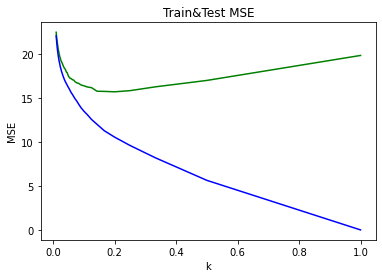

In [38]:
k_plot = [(1/k) for k in range(1,101)]

plt.plot(k_plot,list_test_MSE, color = 'g')
plt.plot(k_plot,list_train_MSE, color = 'b')

plt.title("Train&Test MSE") 
plt.xlabel("k")
plt.ylabel("MSE")
print ('the min_test MSE is', min_test_MSE, 'with K = ',min_test_k)

i.2 Normalization

In [39]:
#data process
df2=df
X = df2.iloc[:, 0:4]
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = df2.iloc [:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=1)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [40]:
#regression
k_range = range (1, 101)

min_test_MSE = 100
min_test_k = 0
min_train_MSE = 100
min_train_k = 0
list_test_MSE = []
list_train_MSE = []

for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors = k)
    neigh.fit(X_train, y_train)
    y_pred_train = neigh.predict(X_train)
    y_pred_test = neigh.predict(X_test)
    test_MSE = metrics.mean_squared_error(y_test,y_pred_test)
    train_MSE = metrics.mean_squared_error(y_train,y_pred_train)
    list_test_MSE.append(test_MSE)
    list_train_MSE.append(train_MSE)
    if test_MSE < min_test_MSE:
        min_test_MSE = test_MSE
        min_test_k = k
    if train_MSE < min_train_MSE:
        min_train_MSE = train_MSE
        min_train_k = k
print ('the min_test MSE is', min_test_MSE, 'with K = ',min_test_k)

the min_test MSE is 14.030553676071062 with K =  5


Text(0, 0.5, 'MSE')

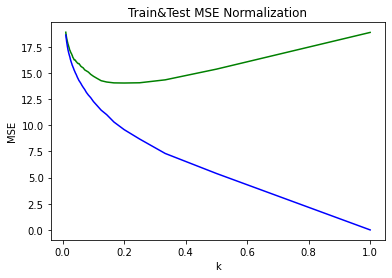

In [41]:
k_plot = [(1/k) for k in range(1,101)]

plt.plot(k_plot,list_test_MSE, color = 'g')
plt.plot(k_plot,list_train_MSE, color = 'b')

plt.title("Train&Test MSE Normalization") 
plt.xlabel("k")
plt.ylabel("MSE")

## j. Analysis

In the model, 70% randomly selected data point were used as training set, and the left 30% as test set. The smallest testing MSE <br>
    <br> 
    The regression error using interaction terms is the test MSE is 20.777478106884395, and the regression error using interaction terms and quadratic nonlinearities(removed insignificant variables) has the test MSE 18.232225767459532.<br> 
    <br> 
    When using KNN regression, the non-normalized data has the smallest test error, 15.704821203761764, when k = 5. While the normalized data with KNN regression gives the smallest test error 14.030553676071062 when k = 5.<br>
    <br> 
    In conclusion, the smallest testing error happens when using KNN regression with normalization.

# 2. ISLR: 2.4.1

 a. A more flexible method is better. Because of the large sample size, flexible method could avoid overfitting without missing key factors. 

 b. A more flexible method is worse. Because of the large number of predictor and small number of observation, we are dealing with a lack of data point and a small training set. If we apply a flexible method, the prediction would overfit data.

c. A more flexible method is better. Flexible method is good at capturing non-linear relationship.

 d. A more flexible method is worse. High variance gives the data a lot of noise. A flexible method is likely to outfit. 

# 3. ISLR: 2.4.7

a. Euclidean distance

 distance = sqrt(x1 **2+x2 **2+x3 **2)

   dist1 = 3, <br>
    dist2 = 2, <br>
    dist3 = sqrt(10), <br>
    dist4 = sqrt(5), <br>
    dist5 = sqrt(2), <br>
    dist6 = sqrt(3).<br>

 b. K = 1 
   

Green <br>
    The test point is closest to obs.5, with distance = sqrt(2)
 

c. K = 3 
   

Red <br>
    The test point is closest to obs.5, obs.2, and obs.6, and the colors are Green, Red, and Red. Therefore the prediction is red.

 d.  
   

K would be smaller. A large K gives smooth boundary, which is the contrary of 'highly - nonlinear'.